In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
from numpy import random

In [2]:
df = pd.read_parquet(r'C:\shared_folder\github_projects\data\tmp.parquet')

In [3]:
df

,device_key,unix_time,min_duration_seconds,observation_count,latitude,longitude,zipcode_5,state_abbr,cluster_type2,datetime,str_time,end_time,datetime_str_time,datetime_end_time
0,1188,1546378629,0,1,41.854000,-87.651000,60608,IL,v,2019-01-01 21:37:09+00:00,1546378629,1546378629,2019-01-01 21:37:09+00:00,2019-01-01 21:37:09+00:00
1,2048,1546353483,0,1,41.840390,-87.783210,60402,IL,v,2019-01-01 14:38:03+00:00,1546353483,1546353483,2019-01-01 14:38:03+00:00,2019-01-01 14:38:03+00:00
2,2048,1546538227,0,1,41.849730,-87.728900,60623,IL,v,2019-01-03 17:57:07+00:00,1546538227,1546538227,2019-01-03 17:57:07+00:00,2019-01-03 17:57:07+00:00
3,2362,1546549696,0,1,42.247950,-88.000360,60060,IL,v,2019-01-03 21:08:16+00:00,1546549696,1546549696,2019-01-03 21:08:16+00:00,2019-01-03 21:08:16+00:00
4,2362,1546549697,61,3,42.247810,-88.000450,60060,IL,t1,2019-01-03 21:08:17+00:00,1546549697,1546549758,2019-01-03 21:08:17+00:00,2019-01-03 21:09:18+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64275,45822518,1546566702,451,3,42.378600,-87.938230,60031,IL,t2,2019-01-04 01:51:42+00:00,1546566702,1546567153,2019-01-04 01:51:42+00:00,2019-01-04 01:59:13+00:00
64276,45822518,1546567003,6068,8,42.378633,-87.938868,60031,IL,v,2019-01-04 01:56:43+00:00,1546567003,1546573071,2019-01-04 01:56:43+00:00,2019-01-04 03:37:51+00:00
64277,45822518,1546574048,4900,5,42.382926,-87.980864,60031,IL,v,2019-01-04 03:54:08+00:00,1546574048,1546578948,2019-01-04 03:54:08+00:00,2019-01-04 05:15:48+00:00
64278,45822518,1546582682,8195,5,42.382920,-87.980898,60031,IL,v,2019-01-04 06:18:02+00:00,1546582682,1546590877,2019-01-04 06:18:02+00:00,2019-01-04 08:34:37+00:00


In [4]:
df = df.drop_duplicates(subset=['device_key','longitude','latitude'])
df

,device_key,unix_time,min_duration_seconds,observation_count,latitude,longitude,zipcode_5,state_abbr,cluster_type2,datetime,str_time,end_time,datetime_str_time,datetime_end_time
0,1188,1546378629,0,1,41.854000,-87.651000,60608,IL,v,2019-01-01 21:37:09+00:00,1546378629,1546378629,2019-01-01 21:37:09+00:00,2019-01-01 21:37:09+00:00
1,2048,1546353483,0,1,41.840390,-87.783210,60402,IL,v,2019-01-01 14:38:03+00:00,1546353483,1546353483,2019-01-01 14:38:03+00:00,2019-01-01 14:38:03+00:00
2,2048,1546538227,0,1,41.849730,-87.728900,60623,IL,v,2019-01-03 17:57:07+00:00,1546538227,1546538227,2019-01-03 17:57:07+00:00,2019-01-03 17:57:07+00:00
3,2362,1546549696,0,1,42.247950,-88.000360,60060,IL,v,2019-01-03 21:08:16+00:00,1546549696,1546549696,2019-01-03 21:08:16+00:00,2019-01-03 21:08:16+00:00
4,2362,1546549697,61,3,42.247810,-88.000450,60060,IL,t1,2019-01-03 21:08:17+00:00,1546549697,1546549758,2019-01-03 21:08:17+00:00,2019-01-03 21:09:18+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64275,45822518,1546566702,451,3,42.378600,-87.938230,60031,IL,t2,2019-01-04 01:51:42+00:00,1546566702,1546567153,2019-01-04 01:51:42+00:00,2019-01-04 01:59:13+00:00
64276,45822518,1546567003,6068,8,42.378633,-87.938868,60031,IL,v,2019-01-04 01:56:43+00:00,1546567003,1546573071,2019-01-04 01:56:43+00:00,2019-01-04 03:37:51+00:00
64277,45822518,1546574048,4900,5,42.382926,-87.980864,60031,IL,v,2019-01-04 03:54:08+00:00,1546574048,1546578948,2019-01-04 03:54:08+00:00,2019-01-04 05:15:48+00:00
64278,45822518,1546582682,8195,5,42.382920,-87.980898,60031,IL,v,2019-01-04 06:18:02+00:00,1546582682,1546590877,2019-01-04 06:18:02+00:00,2019-01-04 08:34:37+00:00


In [5]:
ndf = df.head(1000)

In [6]:
def get_sample_data(n=20):
    df = pd.DataFrame( columns=['unix_time','device_key','latitude','longitude','min_duration_seconds','dupl_idx','str_time','end_time'])
    t = 1607897552
    for i in range(n): 
        key=random.randint(100,999)
        lat=random.uniform(40,70)
        long=random.uniform(-80,-100)
        for j in range(random.randint(2,6)):
            t += 1
            d = random.randint(0,24)
            df = df.append({
                        'unix_time': t,
                        'device_key':str(key),
                        'latitude':random.uniform(40,70)  ,
                        'longitude':random.uniform(-80,-100),
                        'min_duration_seconds': d,
                        'str_time': t,
                        'end_time': t + d,
                        'dupl_idx':"False"},
                        ignore_index=True)   
    keys = df['device_key'].tolist()
    for index, row in df.iterrows():
        if(random.uniform()>0.5):
            t = row['unix_time']
            for _ in range(random.randint(2,6)):
                t += 1
                d = random.randint(0,24)
                df = df.append({
                    'unix_time': t + random.randint(0,20),
                    'device_key':random.choice(keys),
                    'latitude': row['latitude']+ random.random()*0.000001  ,
                    'longitude': row['longitude'] + random.random()*0.000001,
                    'min_duration_seconds' : d,
                    'str_time': t,
                    'end_time': t + d,
                    'dupl_idx': index },
                    ignore_index=True) 
    return df
    
df = get_sample_data(20)
df

,unix_time,device_key,latitude,longitude,min_duration_seconds,dupl_idx,str_time,end_time
0,1607897553,552,66.095531,-80.487888,1,False,1607897553,1607897554
1,1607897554,552,56.304469,-89.771636,6,False,1607897554,1607897560
2,1607897555,552,69.680385,-97.546706,2,False,1607897555,1607897557
3,1607897556,437,46.255378,-89.170995,7,False,1607897556,1607897563
4,1607897557,437,57.704822,-92.932916,11,False,1607897557,1607897568
...,...,...,...,...,...,...,...,...
218,1607897633,681,40.293148,-84.435284,20,66,1607897622,1607897642
219,1607897633,584,53.360444,-90.539179,3,68,1607897622,1607897625
220,1607897629,740,53.360444,-90.539180,1,68,1607897623,1607897624
221,1607897643,162,53.360444,-90.539179,7,68,1607897624,1607897631


In [7]:
ndf = df
coords = ndf.as_matrix(columns=['latitude', 'longitude'])

c:\users\aishw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
coords

array([[ 66.09553125, -80.48788822],
       [ 56.30446898, -89.77163621],
       [ 69.6803848 , -97.54670568],
       [ 46.25537765, -89.17099479],
       [ 57.7048223 , -92.93291622],
       [ 53.97979522, -86.60986612],
       [ 46.93993497, -97.42480113],
       [ 58.80334591, -88.42871932],
       [ 68.16428759, -86.91395648],
       [ 48.31701066, -91.44721127],
       [ 68.6655799 , -89.24382312],
       [ 49.36116647, -97.43664811],
       [ 69.63185989, -98.95519125],
       [ 40.37371351, -85.24471736],
       [ 64.97421498, -87.19161612],
       [ 55.76750312, -91.53029756],
       [ 60.12897147, -96.7723957 ],
       [ 68.77728485, -87.53190832],
       [ 47.40928549, -93.10841229],
       [ 54.42846679, -92.29046507],
       [ 61.32159735, -82.40397324],
       [ 47.42396618, -82.67853211],
       [ 59.84921269, -94.79552406],
       [ 61.7472398 , -89.77313045],
       [ 65.95126367, -97.66388154],
       [ 52.12320987, -86.79931735],
       [ 63.4026671 , -83.23579591],
 

In [9]:
kms_per_radian = 6371.0088
contact_radius = 0.001
min_samples = 3
epsilon = contact_radius / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=min_samples, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 50


In [10]:
cluster_labels

array([ 0,  1, -1,  2, -1, -1,  3, -1, -1,  4,  5,  6,  7, -1, -1,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, -1, -1, 21, 22, -1, 23,
       24, 25, 26, -1, 27, 28, -1, 29, 30, -1, -1, 31, 32, -1, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, -1, 43, -1, -1, 44, 45, 46, -1, 47, -1,
       48,  0,  0,  0,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  4,  4,
        4,  4,  5,  5,  6,  6,  7,  7,  7,  7,  8,  8,  8,  9,  9,  9,  9,
        9, 10, 10, 10, 11, 11, 11, 11, 12, 12, 13, 13, 14, 14, 14, 15, 15,
       16, 16, 16, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20,
       20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 25, 25,
       26, 26, 27, 27, 28, 28, 28, 29, 29, 30, 30, 31, 31, 31, 31, 31, 32,
       32, 33, 33, 33, 33, 33, 34, 34, 34, 35, 35, 36, 36, 37, 37, 37, 38,
       38, 38, 38, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 42, 42, 42, 42,
       42, 43, 43, 43, 43, 44, 44, 44, 45, 45, 46, 46, 47, 47, 47, 48, 48,
       48, 48], dtype=int

In [11]:
def get_centermost_point(cluster):
    centermost_point = None
    if len(cluster) != 0:
        centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
        centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)



In [12]:
clusters = clusters[clusters.str.len() != 0]

In [13]:
print("Ignored points : " ,len(coords) - clusters.map(len).sum())

Ignored points :  20


In [14]:
centermost_points = clusters.map(get_centermost_point)
centermost_points

0       (66.09553172283826, -80.4878876075996)
1     (56.304469071887915, -89.77163561768762)
2     (46.255378176734034, -89.17099438254341)
3      (46.93993542758146, -97.42480099789199)
4      (48.31701125657953, -91.44721096348718)
5      (68.66558033811735, -89.24382310178802)
6      (49.36116647344525, -97.43664734065246)
7      (69.63186031046108, -98.95519113965598)
8      (55.767503522194744, -91.5302970389868)
9      (60.12897164446742, -96.77239532300759)
10     (68.77728541614283, -87.53190760100082)
11    (47.409285702031305, -93.10841187456285)
12    (54.428467056867376, -92.29046453145318)
13     (61.32159747775052, -82.40397285736395)
14      (47.4239665623309, -82.67853182946742)
15    (59.849213465066335, -94.79552317195801)
16      (61.7472401160439, -89.77313033779527)
17      (65.95126405147884, -97.6638813125745)
18      (52.1232105181419, -86.79931711581015)
19     (63.40266722217419, -83.23579574874222)
20     (61.70798009223388, -93.29999820532227)
21    (41.094

In [15]:
centermost_points.dropna()

0       (66.09553172283826, -80.4878876075996)
1     (56.304469071887915, -89.77163561768762)
2     (46.255378176734034, -89.17099438254341)
3      (46.93993542758146, -97.42480099789199)
4      (48.31701125657953, -91.44721096348718)
5      (68.66558033811735, -89.24382310178802)
6      (49.36116647344525, -97.43664734065246)
7      (69.63186031046108, -98.95519113965598)
8      (55.767503522194744, -91.5302970389868)
9      (60.12897164446742, -96.77239532300759)
10     (68.77728541614283, -87.53190760100082)
11    (47.409285702031305, -93.10841187456285)
12    (54.428467056867376, -92.29046453145318)
13     (61.32159747775052, -82.40397285736395)
14      (47.4239665623309, -82.67853182946742)
15    (59.849213465066335, -94.79552317195801)
16      (61.7472401160439, -89.77313033779527)
17      (65.95126405147884, -97.6638813125745)
18      (52.1232105181419, -86.79931711581015)
19     (63.40266722217419, -83.23579574874222)
20     (61.70798009223388, -93.29999820532227)
21    (41.094

In [16]:
ndf['device_key'].unique()

array(['552', '437', '606', '898', '177', '681', '987', '921', '740',
       '584', '202', '931', '279', '162', '389', '386', '108', '291',
       '742', '169'], dtype=object)

In [17]:
nodes = ndf['device_key'].unique()
len(nodes)

20

In [18]:
import networkx as nx

In [19]:
G = nx.Graph()

In [20]:
df['place_id'] = cluster_labels
df

,unix_time,device_key,latitude,longitude,min_duration_seconds,dupl_idx,str_time,end_time,place_id
0,1607897553,552,66.095531,-80.487888,1,False,1607897553,1607897554,0
1,1607897554,552,56.304469,-89.771636,6,False,1607897554,1607897560,1
2,1607897555,552,69.680385,-97.546706,2,False,1607897555,1607897557,-1
3,1607897556,437,46.255378,-89.170995,7,False,1607897556,1607897563,2
4,1607897557,437,57.704822,-92.932916,11,False,1607897557,1607897568,-1
...,...,...,...,...,...,...,...,...,...
218,1607897633,681,40.293148,-84.435284,20,66,1607897622,1607897642,47
219,1607897633,584,53.360444,-90.539179,3,68,1607897622,1607897625,48
220,1607897629,740,53.360444,-90.539180,1,68,1607897623,1607897624,48
221,1607897643,162,53.360444,-90.539179,7,68,1607897624,1607897631,48


In [21]:
df[df.place_id == 2]

,unix_time,device_key,latitude,longitude,min_duration_seconds,dupl_idx,str_time,end_time,place_id
3,1607897556,437,46.255378,-89.170995,7,False,1607897556,1607897563,2
74,1607897567,202,46.255378,-89.170994,21,3,1607897557,1607897578,2
75,1607897565,606,46.255378,-89.170994,7,3,1607897558,1607897565,2
76,1607897565,898,46.255378,-89.170994,8,3,1607897559,1607897567,2
77,1607897560,921,46.255379,-89.170994,23,3,1607897560,1607897583,2
78,1607897562,202,46.255378,-89.170994,13,3,1607897561,1607897574,2


In [22]:
def get_overlap(s1,e1,s2,e2):
    return min(e1,e2) - max(s1,s2)

overlap_threshold = 15
device_keys = set(df[df.place_id == 2])
df2 = df


In [23]:
graphdf = pd.DataFrame(columns=['node1','node2','overlap','place_id',])

# Conditional Self join is not possible in pandas 
for index1,row1 in df.iterrows():
    for index2,row2 in df[(df.place_id == row1.place_id) & (df.index > index1) & (df.device_key != row1.device_key) ].iterrows():
        overlap = min(row1.end_time,row2.end_time) - max(row1.str_time,row2.str_time)
        if(overlap > overlap_threshold):
            graphdf=graphdf.append({'node1':row1.device_key,'node2':row2.device_key,'overlap':overlap,'place_id':row2.place_id},ignore_index=True)

In [24]:
graphdf

,node1,node2,overlap,place_id
0,987,584,18,11
1,921,740,21,16
2,921,742,19,16
3,921,108,18,16
4,740,931,22,19
5,740,921,19,20
6,386,291,19,39
7,291,389,19,46
8,202,921,18,2
9,740,742,19,16


In [25]:
graphdf = graphdf.drop_duplicates(subset=['node1','node2','place_id'],keep='last')

In [26]:
graphdf

,node1,node2,overlap,place_id
0,987,584,18,11
1,921,740,21,16
2,921,742,19,16
3,921,108,18,16
4,740,931,22,19
5,740,921,19,20
6,386,291,19,39
7,291,389,19,46
8,202,921,18,2
9,740,742,19,16


In [27]:
import networkx as nx
G = nx.Graph()

In [28]:
clusters

0     [[66.09553125344267, -80.48788822184089], [66....
1     [[56.30446897762444, -89.77163620522992], [56....
2     [[46.25537765335525, -89.17099478948056], [46....
3     [[46.939934972564885, -97.4248011277028], [46....
4     [[48.317010657138034, -91.44721127200202], [48...
5     [[68.6655799027421, -89.2438231239262], [68.66...
6     [[49.36116647190814, -97.43664811070543], [49....
7     [[69.63185989056731, -98.95519125206343], [69....
8     [[55.767503123352434, -91.5302975556787], [55....
9     [[60.12897147052702, -96.77239570483383], [60....
10    [[68.77728485290706, -87.53190831564798], [68....
11    [[47.40928549418557, -93.10841229192364], [47....
12    [[54.428466791276286, -92.29046507099673], [54...
13    [[61.32159734630038, -82.40397324016581], [61....
14    [[47.42396618348471, -82.67853211380785], [47....
15    [[59.849212686776184, -94.79552405835813], [59...
16    [[61.747239801732896, -89.773130446531], [61.7...
17    [[65.95126366509388, -97.66388154142113], 

In [36]:
weights = clusters.map(len)
weights
for idx,row in graphdf.iterrows():
    G.add_edge(row.node1,row.node2,weight=weights[row.place_id])

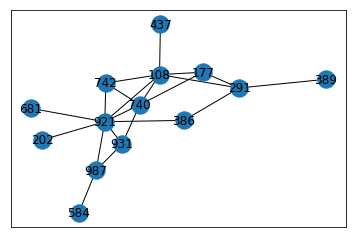

In [62]:
nx.draw_networkx(G)

In [78]:
pr = nx.pagerank(G, alpha=0.85, weight='weight')
{ k : 100*v for k,v in pr.items()}

{'987': 8.51586928150285,
 '584': 3.2003574278559563,
 '921': 19.940366060819898,
 '740': 10.52931385243848,
 '742': 5.903166808397174,
 '108': 11.989695342012944,
 '931': 8.325964180174463,
 '386': 5.377557308683922,
 '291': 8.563327012510019,
 '389': 2.527225183708882,
 '202': 3.4364951589768427,
 '681': 3.0423173943854644,
 '177': 5.878392167491279,
 '437': 2.769952821041822}

In [81]:
personalization={n : 0 for n in nodes}
personalization['389']=1
personalization['437']=1
personalization

{'552': 0,
 '437': 1,
 '606': 0,
 '898': 0,
 '177': 0,
 '681': 0,
 '987': 0,
 '921': 0,
 '740': 0,
 '584': 0,
 '202': 0,
 '931': 0,
 '279': 0,
 '162': 0,
 '389': 1,
 '386': 0,
 '108': 0,
 '291': 0,
 '742': 0,
 '169': 0}

In [82]:
pr = nx.pagerank(G, alpha=0.85,personalization=personalization, weight='weight')
{ k : 100*v for k,v in pr.items()}

{'987': 3.444446522050013,
 '584': 0.8610865813629573,
 '921': 12.583140796284633,
 '740': 8.027843734423781,
 '742': 4.6378749251512765,
 '108': 17.33786134862907,
 '931': 4.3058499120792595,
 '386': 4.811615640703562,
 '291': 14.643185511508438,
 '389': 9.98936280348501,
 '202': 1.492465236056883,
 '681': 1.2437210300474026,
 '177': 6.665368376028895,
 '437': 9.956177582188804}

In [52]:
graphdf

,node1,node2,overlap,place_id
0,987,584,18,11
1,921,740,21,16
2,921,742,19,16
3,921,108,18,16
4,740,931,22,19
5,740,921,19,20
6,386,291,19,39
7,291,389,19,46
8,202,921,18,2
9,740,742,19,16


In [93]:
hc = nx.betweenness_centrality(G,distance='weight')
{k:v/len(bc.keys()) for k,v in bc.items()}

TypeError: betweenness_centrality() got an unexpected keyword argument 'distance'

In [94]:
from networkx.readwrite import json_graph
json_graph.node_link_data(G)

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': '987'},
  {'id': '584'},
  {'id': '921'},
  {'id': '740'},
  {'id': '742'},
  {'id': '108'},
  {'id': '931'},
  {'id': '386'},
  {'id': '291'},
  {'id': '389'},
  {'id': '202'},
  {'id': '681'},
  {'id': '177'},
  {'id': '437'}],
 'links': [{'weight': 5, 'source': '987', 'target': '584'},
  {'weight': 6, 'source': '987', 'target': '931'},
  {'weight': 6, 'source': '987', 'target': '921'},
  {'weight': 6, 'source': '921', 'target': '740'},
  {'weight': 4, 'source': '921', 'target': '742'},
  {'weight': 4, 'source': '921', 'target': '108'},
  {'weight': 6, 'source': '921', 'target': '202'},
  {'weight': 5, 'source': '921', 'target': '681'},
  {'weight': 6, 'source': '921', 'target': '386'},
  {'weight': 6, 'source': '921', 'target': '931'},
  {'weight': 6, 'source': '740', 'target': '931'},
  {'weight': 4, 'source': '740', 'target': '742'},
  {'weight': 4, 'source': '740', 'target': '108'},
  {'weight': 3, 'source'

In [99]:
metricsdf = pd.DataFrame({'pagerank':pr , 'harmonic_centrality':hc}).sort_values(by=['pagerank'])

In [103]:
metricsdf.to_dict()

{'pagerank': {'584': 0.008610865813629574,
  '681': 0.012437210300474026,
  '202': 0.014924652360568832,
  '987': 0.03444446522050013,
  '931': 0.0430584991207926,
  '742': 0.046378749251512766,
  '386': 0.04811615640703562,
  '177': 0.06665368376028895,
  '740': 0.08027843734423781,
  '437': 0.09956177582188803,
  '389': 0.09989362803485011,
  '921': 0.12583140796284634,
  '291': 0.14643185511508439,
  '108': 0.1733786134862907},
 'harmonic_centrality': {'584': 0.9574713856834598,
  '681': 1.2325369075369075,
  '202': 1.1228418640183349,
  '987': 1.3473516679399031,
  '931': 1.3704476079476078,
  '742': 1.8115440115440118,
  '386': 1.483498854087089,
  '177': 1.877570528886318,
  '740': 1.9418321874204223,
  '437': 1.3930827943985837,
  '389': 1.4227336389101093,
  '921': 2.0901515151515153,
  '291': 1.950525351841141,
  '108': 2.245634920634921}}